In [25]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import np_utils
#total train 35126
#total test 53576

In [26]:
root='~/Downloads/spark/'
trainLabels = pd.read_csv(root +r"trainLabels.csv")
print trainLabels.head(200),'\n\n'

testLabels = pd.read_csv(root +r"testLabels.csv")
print testLabels.head()

         image  level
0      10_left      0
1     10_right      0
2      13_left      0
3     13_right      0
4      15_left      1
5     15_right      2
6      16_left      4
7     16_right      4
8      17_left      0
9     17_right      1
10     19_left      0
11    19_right      0
12     20_left      0
13    20_right      0
14     21_left      0
15    21_right      0
16     22_left      0
17    22_right      0
18     23_left      0
19    23_right      0
20     25_left      0
21    25_right      0
22     30_left      1
23    30_right      2
24     31_left      0
25    31_right      0
26     33_left      0
27    33_right      0
28     36_left      1
29    36_right      0
..         ...    ...
170   203_left      0
171  203_right      0
172   204_left      0
173  204_right      1
174   208_left      0
175  208_right      0
176   210_left      0
177  210_right      0
178   211_left      0
179  211_right      0
180   214_left      1
181  214_right      0
182   216_left      0
183  216_r

In [5]:
#current accuracy invalid as train aug set used against itself

In [8]:
import os
root='/media/aditya/Data/'
files = os.listdir(root +r"train")
print("No. of Files in the Train : " + str(np.size(files)))
test_files = os.listdir(root +r"test")
print("No. of Files in the Test : " + str(np.size(test_files)))

No. of Files in the Train : 35126
No. of Files in the Test : 53576


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.resize(cv.imread(eyes_db+eyes[56456]),(256,256))

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

10003_left.jpeg
10003_left
0
<class 'PIL.JpegImagePlugin.JpegImageFile'>


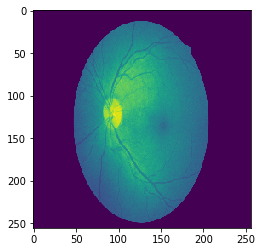

In [15]:
#Sample Dataset processing 

base = os.path.basename(files[0])
print(base)
fileName = os.path.splitext(base)[0]
print(fileName)
print(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])

im = Image.open(root + "train/" + files[0])   
img = im.resize((256,256))
gray = img.convert('L')                                 #L = R * 299/1000 + G * 587/1000 + B * 114/1000 grayscale                             
print type(im)
plt.imshow(gray)

In [28]:
#Dataset Processing 

immatrix = [] #to store the images
imlabel = [] #to store the labels
img_rows = 200
img_cols = 200

for file in files:
    base = os.path.basename(file)
    #gets the filename
    fileName = os.path.splitext(base)[0]
    #the file name without extension
    
    #Appending the corresponding label value of the image from the CSV file
    imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    
    #Opening the image
    root='/media/aditya/Data/'
    img = Image.open(root + r"/train/" + file)
    #Resizing the image
    img_resized = im.resize((img_rows,img_cols))
    gray_img = img_resized.convert('L')
    #Appending the image in 1D form
    immatrix.append(np.array(gray_img).flatten())
    

In [29]:
immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)

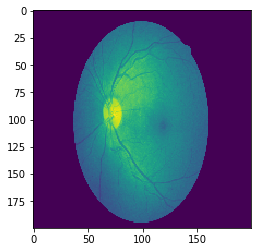

In [30]:
#Sample image plot

plt.imshow(immatrix[0].reshape(img_rows,img_cols))

In [71]:
data, label = shuffle(immatrix, imlabel, random_state=24)
#Consolidating images and labels

trainData = [data, label]


In [74]:
(X, y) = (trainData[0], trainData[1])

#Splitting the data into Train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(X_train.shape)
print(X_test.shape)

#Reshaping the flattened numpy array into a image matrix 
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(6726, 40000)
(1682, 40000)
X_train shape: (6726, 200, 200, 1)
6726 train samples
1682 test samples


In [77]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)

Y_train[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [82]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 5
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [81]:
#Keras CNN Architecture

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))

convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

C:\Users\Sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
  import sys
C:\Users\Sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [83]:
# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=8
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [85]:
model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/batchsize), epochs=2, validation_data=validation_generator, validation_steps=int(len(X_test)/batchsize))

Epoch 1/2
840/840 [==============================] - 1838s 2s/step - loss: 0.9493 - val_loss: 1.0403
Epoch 2/2
840/840 [==============================] - 1965s 2s/step - loss: 0.9026 - val_loss: 0.8664


In [86]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

0.8680949558400938


In [102]:
#Sample Prediction 
i = np.expand_dims(X_test[0], axis=0)
print(model.predict(i))
Y_test[0]

[[0.76974094 0.05083661 0.14912918 0.01722747 0.0130659 ]]


array([1., 0., 0., 0., 0.], dtype=float32)

In [100]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model


In [101]:
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')